In [1]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
sns.set_style('whitegrid')
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# for HD visualizations
%config InlineBackend.figure_format='retina'

C:\Users\bhara\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#pip install sidetable


# Exploratory Data Analysis (EDA) :---

In [3]:
df=pd.read_csv("C:\data\dataframe_.csv") # load the data set

In [4]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [5]:
df.shape # knowing the sahpe of the data

(1697, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [7]:
df.dtypes

input     float64
output    float64
dtype: object

In [8]:
df.describe() # knoing the statistical describe

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [9]:
df.describe(include='all') # describe the all the columns

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


# Checking the `Null Values `

In [10]:
[features for features in df.columns if df[features].isna().sum()>0] # there is no null vaues in dataset

['input', 'output']

In [11]:
df.isna().sum() # another approach to getting the null vbaues

input     1
output    1
dtype: int64

In [12]:
df[df.input.isna()]

,input,output
1439,NaN,NaN


In [13]:
df[df.output.isna()]

,input,output
1439,NaN,NaN


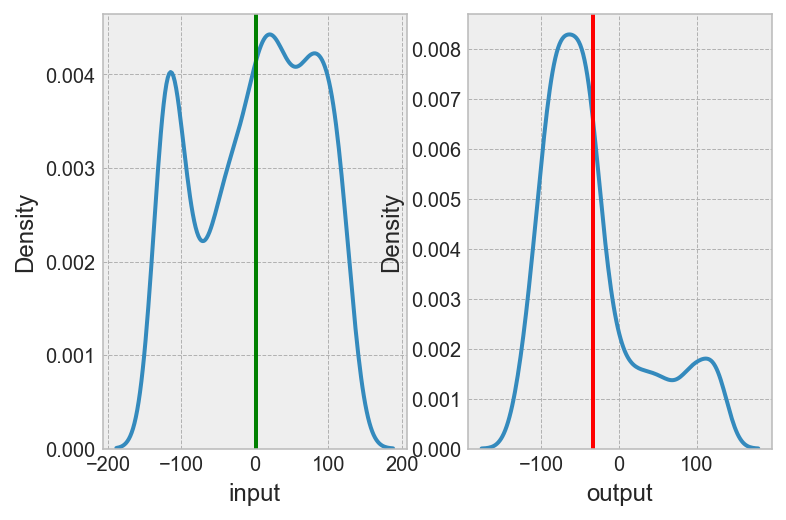

In [14]:
plt.subplot(121)
sns.kdeplot(df.input)
plt.axvline(np.mean(df.input),color='green')
plt.axvline(np.median(df.input),color='red')


plt.subplot(122)
sns.kdeplot(df.output)
plt.axvline(np.mean(df.output),color='red')
plt.axvline(np.median(df.output),color='green');

In [15]:
mean=round(df.input.mean(),2) # calculate the mean of the input

In [16]:
mean1=round(df.output.mean(),2) # calculate the mean of the output

In [17]:
df.input.replace(np.nan,mean,inplace=True) # replace the nan value  with the mean

In [18]:
df.output.replace(np.nan,mean1,inplace=True) # replace the nan value  with the mean

In [19]:
df.isna().sum()

input     0
output    0
dtype: int64

# checking `Duplicates`

In [20]:
df[df.duplicated].value_counts() # duplicates in dataframe

input        output     
-125.366669   131.000000    8
-131.366669  -125.000000    3
 3.633331    -95.000000     3
-63.366669   -33.000000     3
 20.633331   -95.000000     3
                           ..
-47.372933   -50.565111     1
-47.188739   -67.569154     1
-46.366669   -42.000000     1
-46.274456   -25.429007     1
 134.463181   125.120374    1
Length: 585, dtype: int64

In [21]:
df.drop_duplicates(keep='first',inplace=True) # drop the duplicates in the datafram

In [22]:
df.shape # again checking the datafram after removing the duplicates

(1091, 2)

#  ' skewness'

In [23]:
df.skew()

input    -0.283556
output    0.922913
dtype: float64

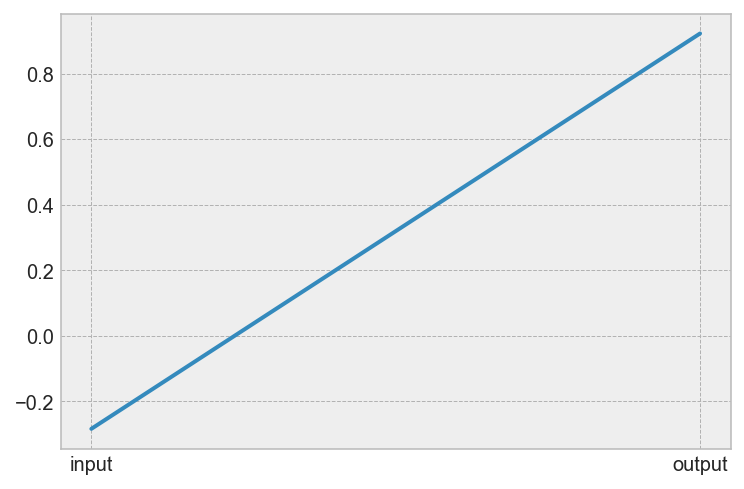

In [24]:
plt.plot(df.skew());

# checking outliers by using ` Z-Score`

In [25]:
# checking the outliers by using boxplot

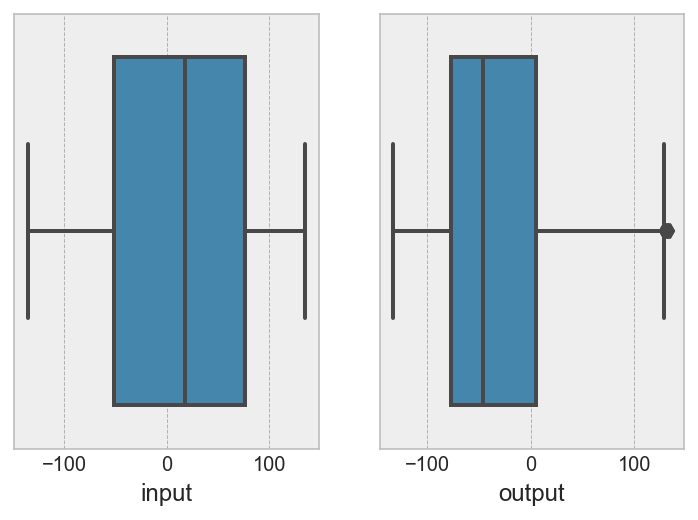

In [26]:
plt.subplot(121)
sns.boxplot(df.input)

plt.subplot(122)

sns.boxplot(df.output);

# removing outliers by using `IQR Method`

In [27]:
Q1,Q2,Q3=tuple(df.output.quantile (q= [0.25,0.5,0.75]).values)

In [28]:
print(Q1,Q2,Q3)

-76.9885951 -46.26979181 5.0754008045


In [29]:
IQR=Q3-Q1

In [30]:
UL=Q3+1.5*IQR

In [31]:
LL=Q1-1.5*IQR

In [32]:
UL=round(UL,2)
LL=round(LL,2)
IQR=round(IQR,2)
IQR
UL
LL

82.06

128.17

-200.08

In [33]:
drop_list=df[(df.output < LL) | (df.output > UL)].index.tolist()

In [34]:
len(drop_list)

18

In [35]:
df.drop(drop_list,axis=0,inplace=True)

In [36]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1105,-112.018496,121.096397
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1110,-110.344221,123.087950


# z - score

In [37]:
outliers=[]
def detect_otlier(df):
    threshold=3
    mean=np.mean(df.output)
    std=np.std(data.output)
    
    for i in data:
        z_score=(i - mean )/std
        if np.abs(z_score) > threshold:
            ouliers.append(i)
    return outliers

In [38]:
outliers

[]

<AxesSubplot:xlabel='output'>

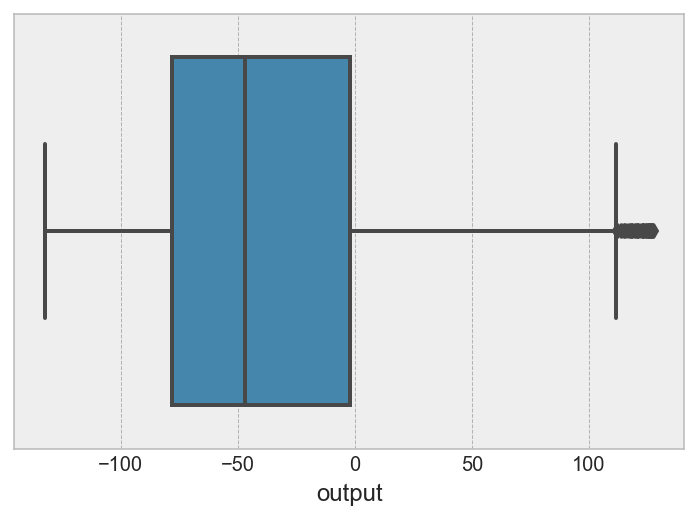

In [39]:
sns.boxplot(df.output) # checking the outliers on bmi column

<AxesSubplot:xlabel='input'>

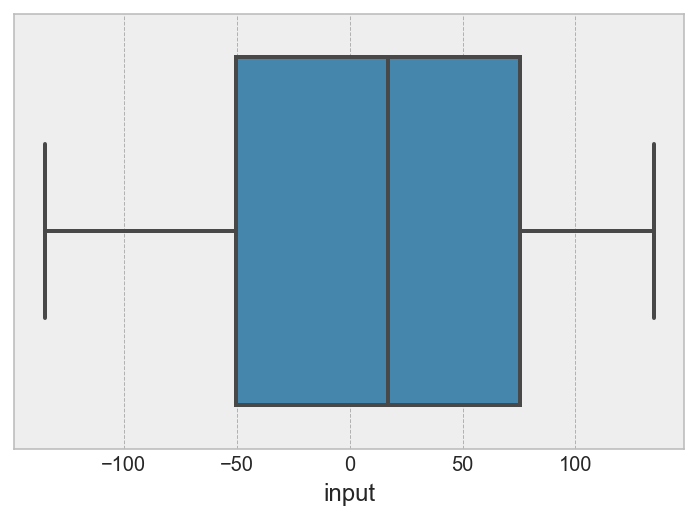

In [40]:
sns.boxplot(df.input)

# Analysis

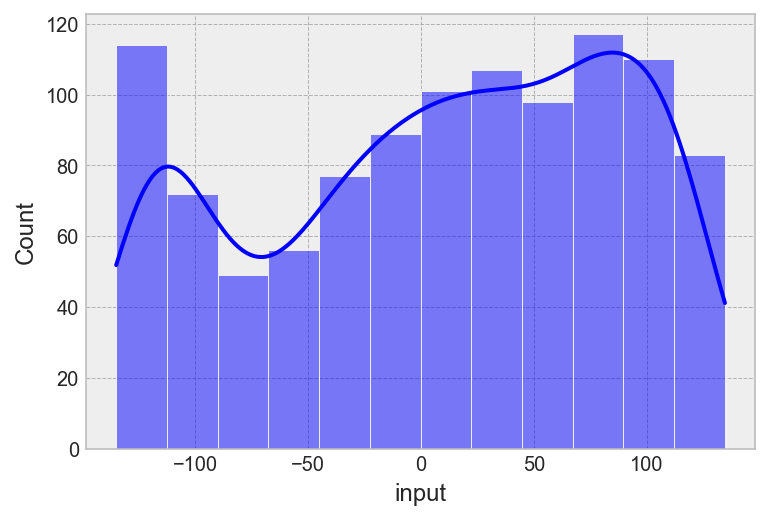

In [41]:
sns.histplot(df.input,kde=True);

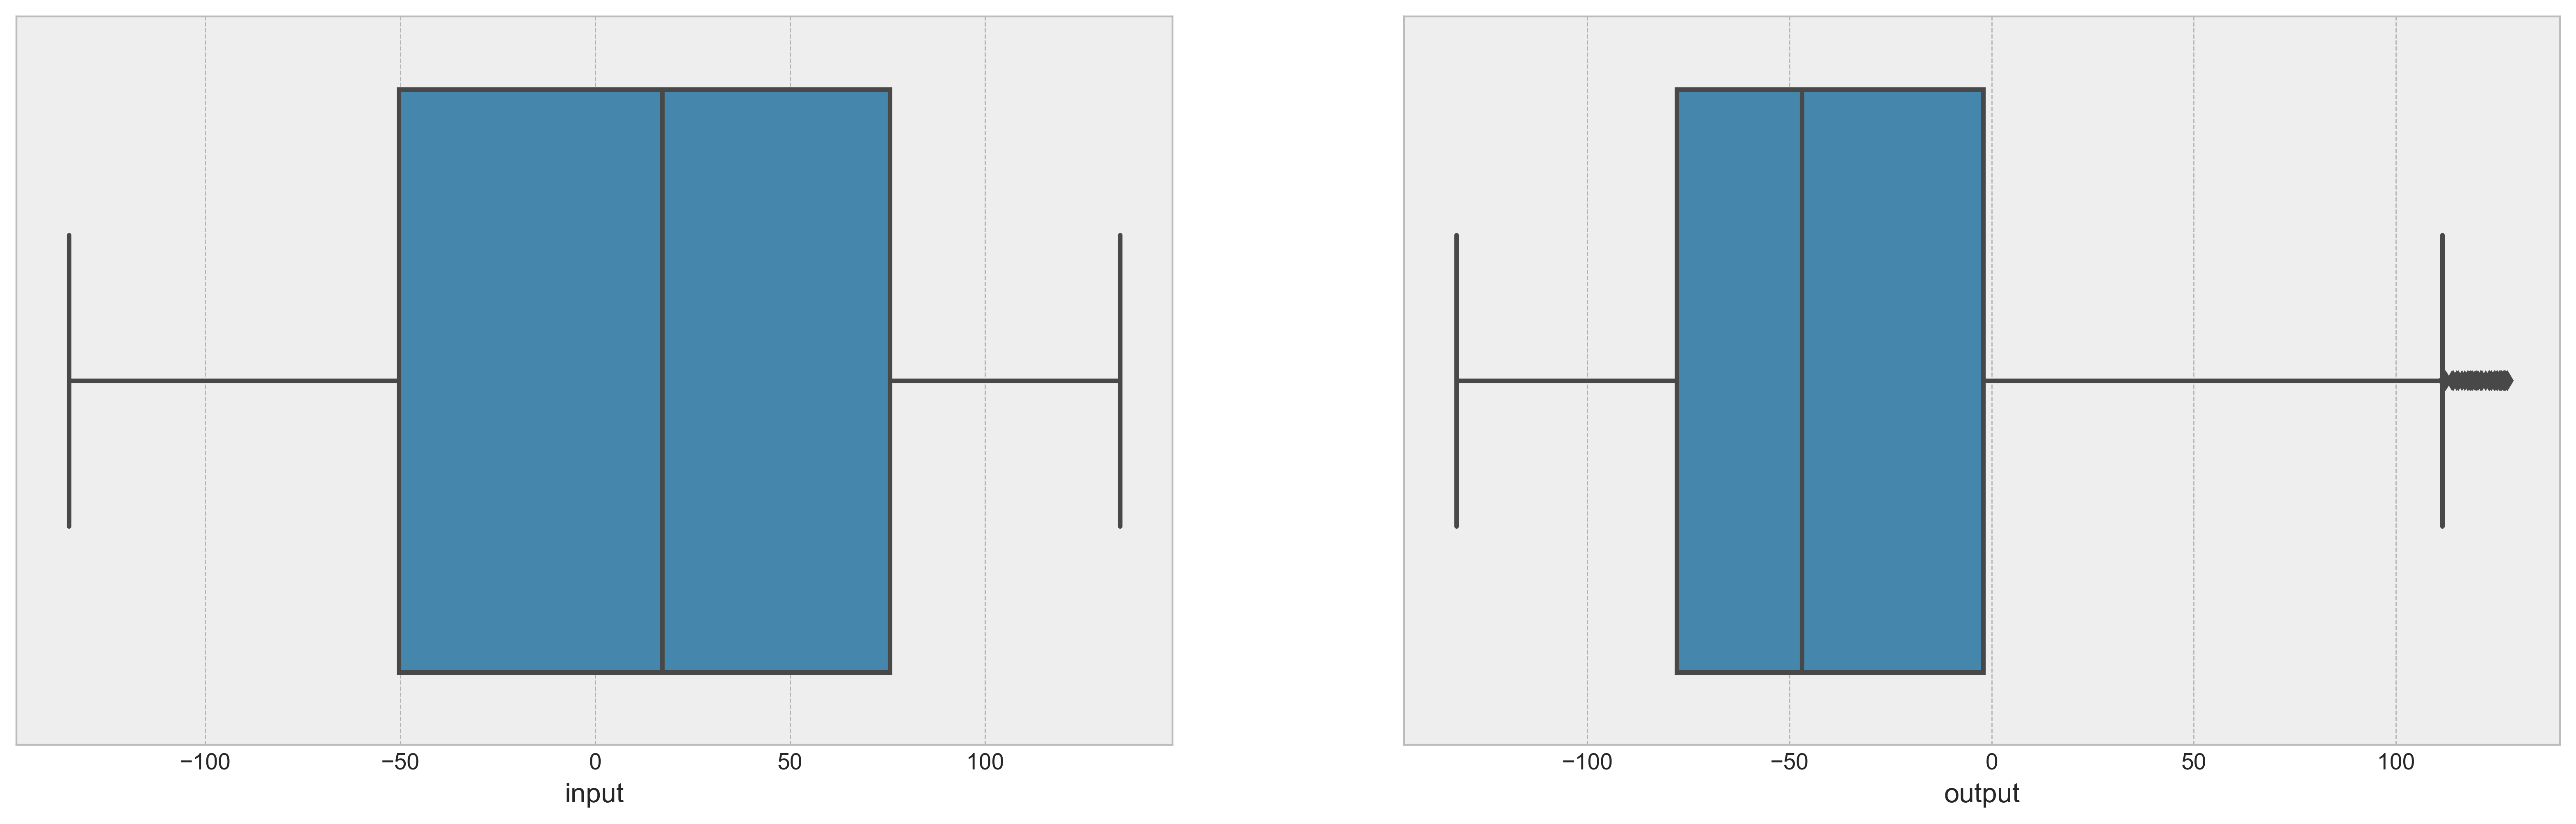

In [42]:
plt.figure(figsize=(20,20),dpi=200)
plt.subplot(321)
sns.boxplot(df.input)
plt.subplot(322)
sns.boxplot(df.output);

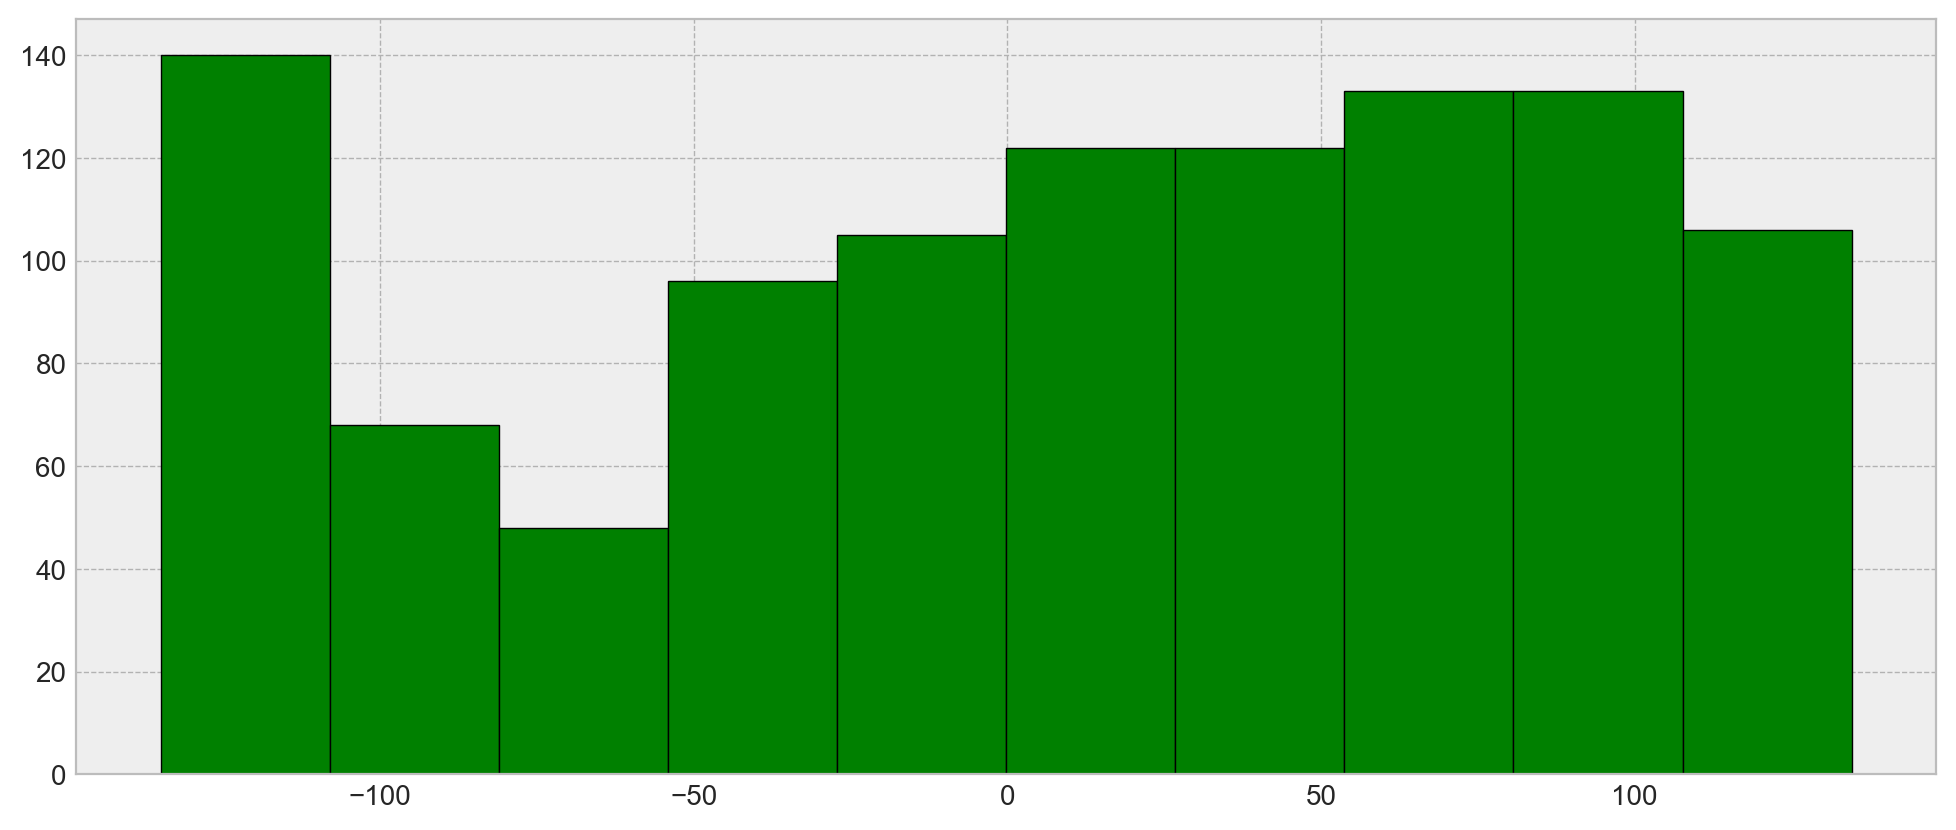

In [43]:
plt.figure(figsize=(12,5), dpi = 100)
plt.hist(df.input, color = 'green', edgecolor = 'black')
plt.show();

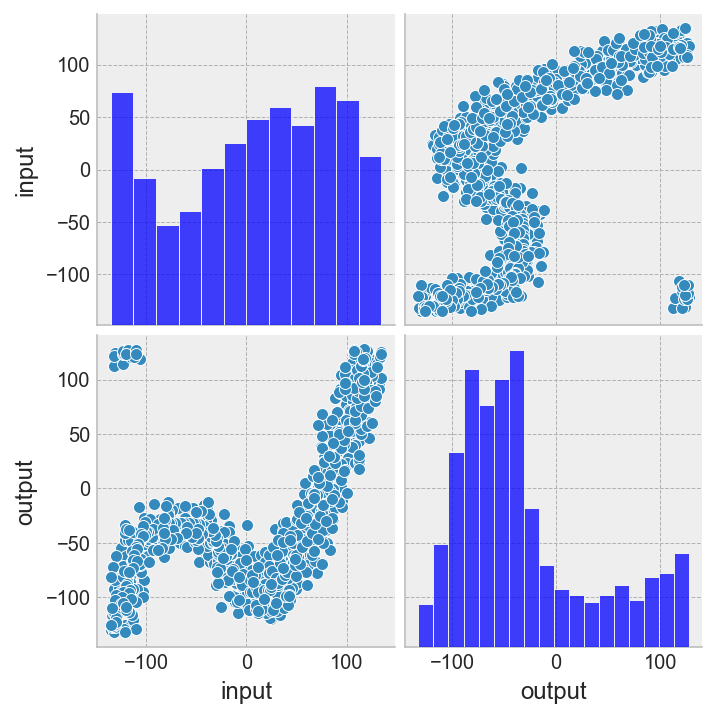

In [44]:
sns.pairplot(df)

In [45]:
df.input.count()

1073

<AxesSubplot:>

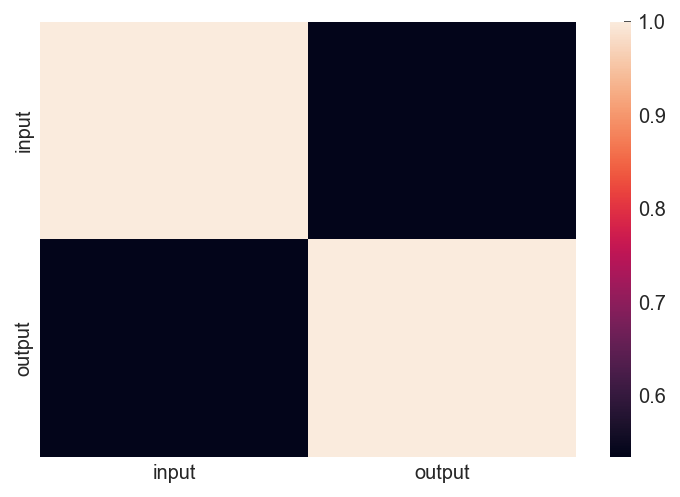

In [46]:
sns.heatmap(df.corr())

In [47]:
df.to_csv("C:\data\df_clean.csv")

# load the DATASET

In [48]:
cl_df=pd.read_csv("C:\data\df_clean.csv")

In [49]:
cl_df.head()

,Unnamed: 0,input,output
0,0,-122.740667,-130.572085
1,1,-121.531419,-129.938929
2,2,-134.917019,-130.141832
3,3,-120.605951,-125.760932
4,4,-129.894781,-112.785214


In [50]:
cl_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [51]:
cl_df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


# Machine Learing


# identifying the output and input variables in dataset

In [52]:
cl_df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [53]:
y = cl_df['output']
X = cl_df[['input']]

# separating the dataset into `train` and `test`.

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(751, 1) (751,)
(322, 1) (322,)


In [55]:
X_train.head()

,input
32,-125.085620
557,65.633331
195,-13.267539
570,68.029492
336,126.257790


## Scaling the -- Numerical Features --

In [56]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_transformed.head()

,input
32,-1.646388
557,0.751026
195,-0.240790
570,0.781147
336,1.513100


In [57]:
X_train_transformed.describe()

,input
count,7.510000e+02
mean,-1.182661e-18
std,1.000666e+00
min,-1.770549e+00
25%,-8.306259e-01
50%,1.020460e-01
75%,8.801983e-01
max,1.618038e+00


In [58]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
Mean of each column: [5.8877421]
Std of each column: [79.55192915]


In [59]:
X_test.head()

,input
433,115.000547
30,-126.637640
880,18.746631
225,12.633331
740,-65.366669


In [60]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                    columns = X_test.columns, 
                                    index = X_test.index)

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [62]:
y_test_pred = regressor.predict(X_test_transformed)

In [63]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
433,65.496198,19.602846
30,-91.746958,-90.372448
880,-87.630022,-24.204604
225,-78.000000,-26.986912
740,-32.000000,-62.486570


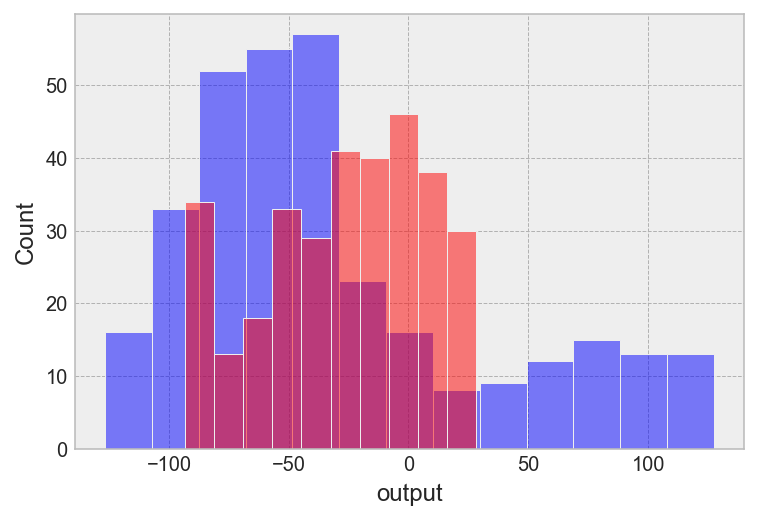

In [64]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [65]:
from sklearn import metrics

MeanAbsoluteError_LR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_LR)

print('Mean Squared Error: ', MeanSquaredError_LR)

print('Root Mean Squared Error: ', RootMeanSquaredError_LR)

Mean Absolute Error:  42.31810980582538
Mean Squared Error:  2964.403802829944
Root Mean Squared Error:  54.44633874586926


### KNN Regression

In [66]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [67]:
y_test_pred = regressor.predict(X_test_transformed)

In [68]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
433,65.496198,94.070039
30,-91.746958,-58.144514
880,-87.630022,-93.193453
225,-78.000000,-95.546076
740,-32.000000,-29.905598


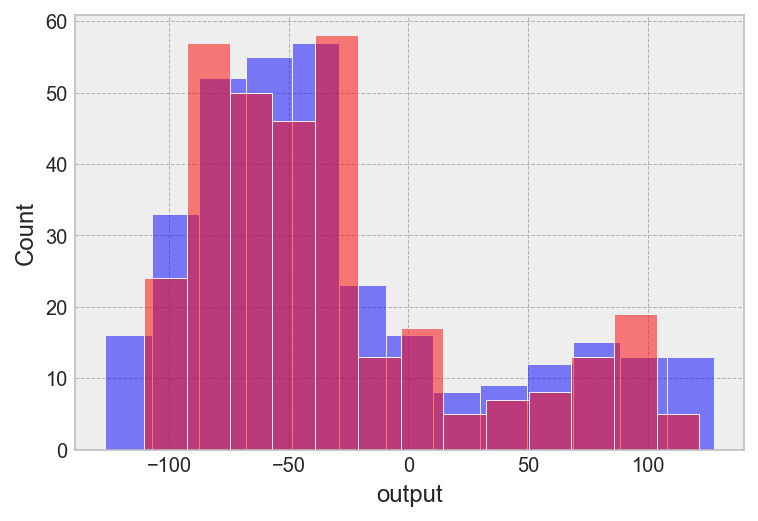

In [69]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [148]:
MeanAbsoluteError_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_KNN = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_KNN)

print('Mean Squared Error: ', MeanSquaredError_KNN)

print('Root Mean Squared Error: ', RootMeanSquaredError_KNN)
from sklearn import metrics


Mean Absolute Error:  0.252500674867641
Mean Squared Error:  0.10478359786824289
Root Mean Squared Error:  0.3237029469563768


## Decision Tree Regression

In [71]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [72]:
y_test_pred = regressor.predict(X_test_transformed)

In [73]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
433,65.496198,97.553920
30,-91.746958,-111.000000
880,-87.630022,-95.782667
225,-78.000000,-95.000000
740,-32.000000,-20.975137


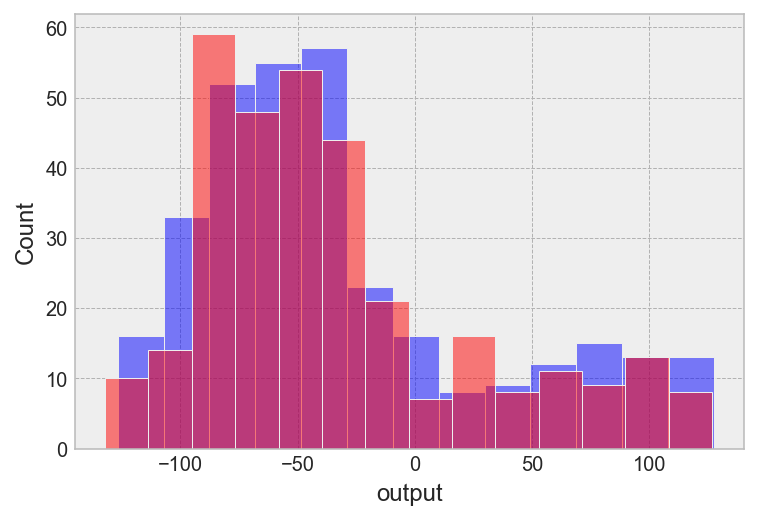

In [74]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [75]:
from sklearn import metrics

MeanAbsoluteError_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_DTR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_DTR)

print('Mean Squared Error: ', MeanSquaredError_DTR)

print('Root Mean Squared Error: ', RootMeanSquaredError_DTR)

Mean Absolute Error:  26.455632218944103
Mean Squared Error:  2067.7106634291977
Root Mean Squared Error:  45.4720866403687


## Random Forest Regression

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [77]:
y_test_pred = regressor.predict(X_test_transformed)

In [78]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
433,65.496198,100.741372
30,-91.746958,-88.073489
880,-87.630022,-94.005308
225,-78.000000,-96.695124
740,-32.000000,-26.108938


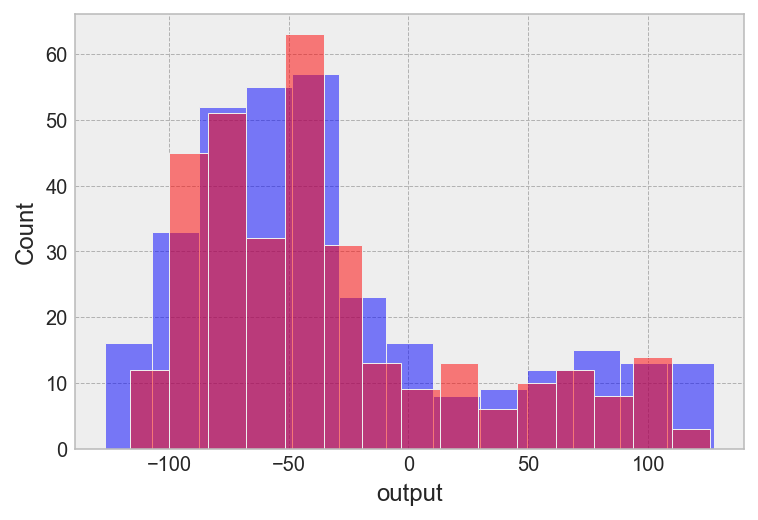

In [79]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [80]:
from sklearn import metrics

MeanAbsoluteError_RFR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_RFR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_RFR)

print('Mean Squared Error: ', MeanSquaredError_RFR)

print('Root Mean Squared Error: ', RootMeanSquaredError_RFR)

Mean Absolute Error:  23.085627652009165
Mean Squared Error:  1393.500959632542
Root Mean Squared Error:  37.32962576336042


## Support Vector Regressor

In [81]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
 #### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [82]:
y_test_pred = regressor.predict(X_test_transformed)

In [83]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
433,65.496198,44.018616
30,-91.746958,-60.350026
880,-87.630022,-78.938745
225,-78.000000,-80.000466
740,-32.000000,-42.150285


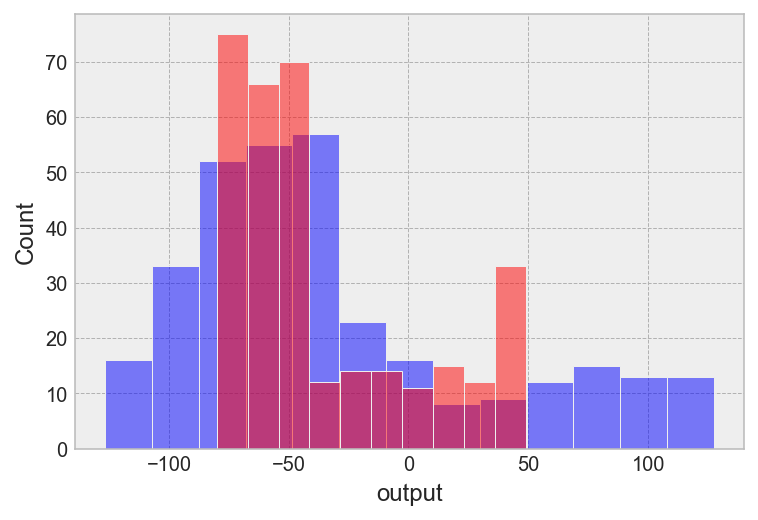

In [84]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [85]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  23.773135726606117
Mean Squared Error:  1371.9200246728146
Root Mean Squared Error:  37.03943877372894


## Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [87]:
y_test_pred = regressor.predict(X_test_transformed)

In [88]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
433,65.496198,95.187117
30,-91.746958,-96.221305
880,-87.630022,-88.256967
225,-78.000000,-88.256967
740,-32.000000,-39.165076


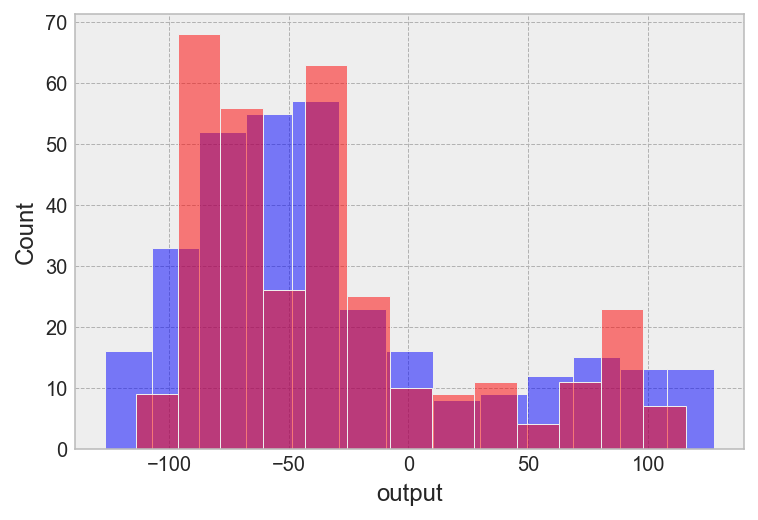

In [89]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [90]:

from sklearn import metrics

MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_GBDT)

print('Mean Squared Error: ', MeanSquaredError_GBDT)

print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)




Mean Absolute Error:  20.12362975061824
Mean Squared Error:  1321.1999965129032
Root Mean Squared Error:  36.34831490609851


In [94]:
cll_df = [['Linear Regression',MeanAbsoluteError_LR, MeanSquaredError_LR, RootMeanSquaredError_LR],
                   ['K-Nearest Neighbor Regression', MeanAbsoluteError_KNN, MeanSquaredError_KNN, RootMeanSquaredError_KNN ],
                   ['Decision Tree Regression', MeanAbsoluteError_DTR,MeanSquaredError_DTR, RootMeanSquaredError_DTR ],
                   ['Random Forest Regression ', MeanAbsoluteError_RFR,MeanSquaredError_RFR, RootMeanSquaredError_RFR ],
                   ['Gradient Boosting Decision Tree', MeanAbsoluteError_GBDT,MeanSquaredError_GBDT, RootMeanSquaredError_GBDT ]]

data = pd.DataFrame(cll_df, columns = ['Algorithm','Mean Absolute Error','Mean Square Error','Root Mean Square Error'])


In [95]:
data

,Algorithm,Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,Linear Regression,42.318110,2964.403803,54.446339
1,K-Nearest Neighbor Regression,21.747078,1221.107719,34.944352
2,Decision Tree Regression,26.455632,2067.710663,45.472087
3,Random Forest Regression,23.085628,1393.500960,37.329626
4,Gradient Boosting Decision Tree,20.123630,1321.199997,36.348315


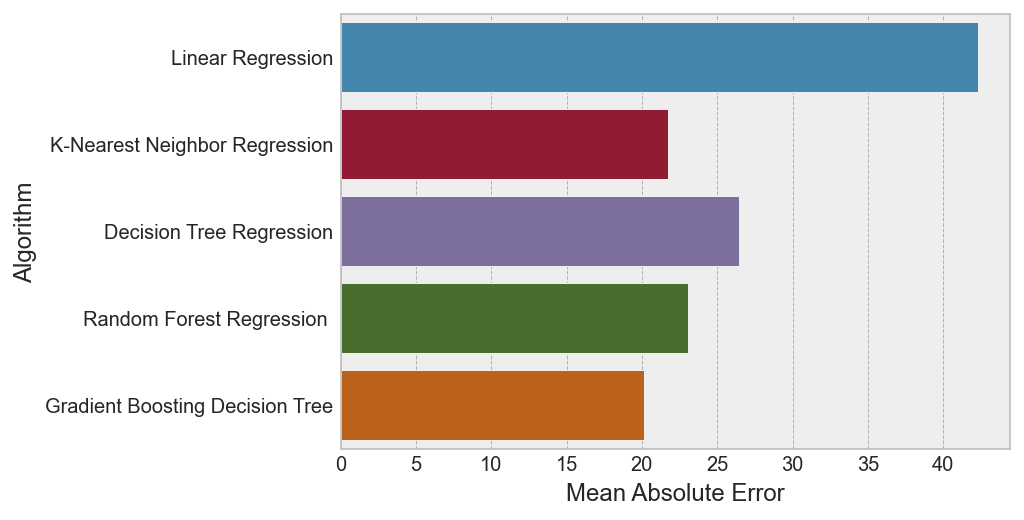

In [96]:
sns.barplot(y=data.Algorithm,x=data['Mean Absolute Error'],ci=False,orient='h');

 # conclusion
 
 * Linear Regression---Mean Absolute Error:  44.204843	
 * KNN Regression   ---Mean Absolute Error:  26.023140
 * Decision Tree Regression --- Mean Absolute Error:  30.495444
 * Random Forest Regression --- Mean Absolute Error:  27.823460
 * Support Vector Regresso  --- Mean Absolute Error:  26.05009627417253
 * Gradient Boosting Regressor --- Mean Absolute Error:  24.249289
 
 
 ### By observing in all the above obsarvations `GBR [Gradient Boosting Regressor]` is the less `Mean Absolute Error`  comparing the other mean absolute error

# cube root

# Bonus,,,,

In [97]:
cl_df.shape

(1073, 2)

In [98]:
cl_df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [99]:
cl_df['cube_root']=cl_df.output**(1/3)

In [100]:
cl_df.head()

,input,output,cube_root
0,-122.740667,-130.572085,NaN
1,-121.531419,-129.938929,NaN
2,-134.917019,-130.141832,NaN
3,-120.605951,-125.760932,NaN
4,-129.894781,-112.785214,NaN


In [101]:
cl_df.isna().sum()

input          0
output         0
cube_root    810
dtype: int64

# Log Transform

In [102]:
cl_df['Log_Transform']=np.log(cl_df.output)

In [117]:
cl_df.tail(10)

,input,output,cube_root,Log_Transform
1063,-123.371849,123.189683,4.975745,4.813725
1064,-115.366669,121.000000,4.946087,4.795791
1065,-122.657676,124.699202,4.995986,4.825904
1066,-122.879792,125.834014,5.011096,4.834964
1067,-117.945503,126.797385,5.023851,4.842590
1068,-112.018496,121.096397,4.947401,4.796587
1069,-119.954237,123.609122,4.981386,4.817124
1070,-109.942155,127.197394,5.029129,4.845740
1071,-110.344221,123.087950,4.974375,4.812899
1072,1.160000,-34.090000,NaN,NaN


In [104]:
df2=cl_df.copy()

In [105]:
df2.head()

,input,output,cube_root,Log_Transform
0,-122.740667,-130.572085,NaN,NaN
1,-121.531419,-129.938929,NaN,NaN
2,-134.917019,-130.141832,NaN,NaN
3,-120.605951,-125.760932,NaN,NaN
4,-129.894781,-112.785214,NaN,NaN


In [110]:
c=round(df2.cube_root.mean(),2)

In [111]:
l=round(df2.Log_Transform.mean(),2)

In [112]:
df2.cube_root.replace(np.nan,c,inplace=True)

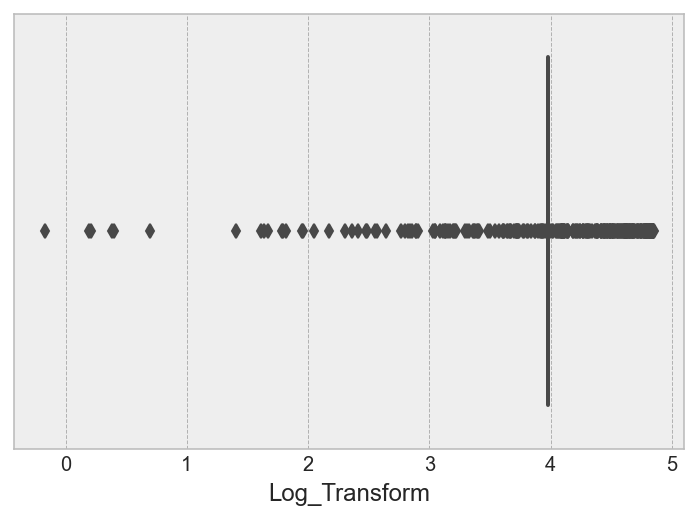

In [115]:
sns.boxplot(df2.Log_Transform);

# normalization

In [128]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [129]:
# Normalization
mm = MinMaxScaler()

In [130]:
norm = mm.fit_transform(df2.output.values.reshape(-1,1))

In [131]:
norm.min()
norm.max()

0.0

1.0

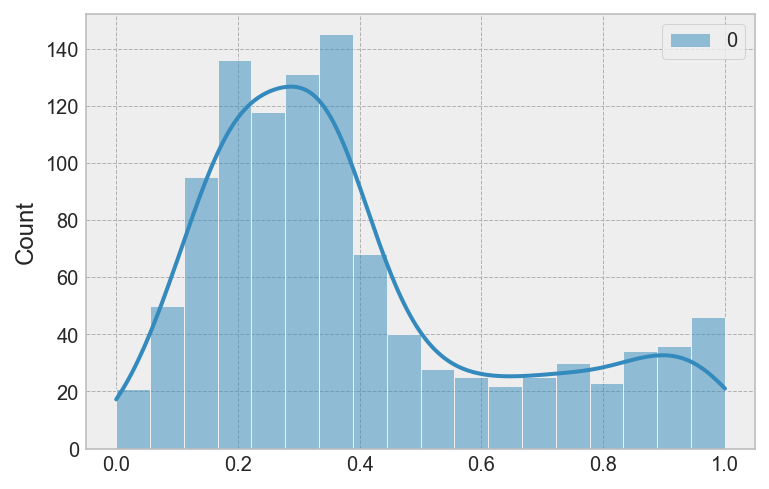

In [132]:
sns.histplot(norm, kde = True);

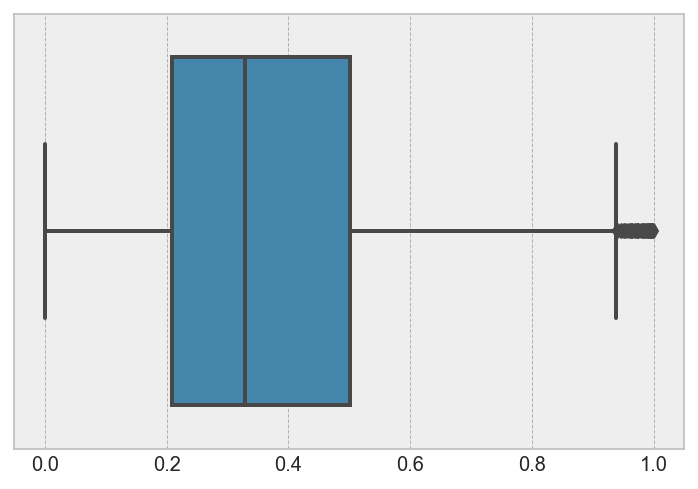

In [133]:
sns.boxplot(norm);

In [134]:
df2['Norm']=norm

In [135]:
df2.head()

,input,output,cube_root,Log_Transform,Norm
0,-122.740667,-130.572085,3.93,3.98,0.007116
1,-121.531419,-129.938929,3.93,3.98,0.009551
2,-134.917019,-130.141832,3.93,3.98,0.008771
3,-120.605951,-125.760932,3.93,3.98,0.025620
4,-129.894781,-112.785214,3.93,3.98,0.075528


# Machine Learning

In [136]:
y=df2['Norm']
x=df2[['input']]


In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=0)
print(x_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(751, 1) (322, 1)
(751,) (322,)


In [141]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_transformed=pd.DataFrame(scaler.fit_transform(x_train),
                                columns=x_train.columns,
                                index=x_train.index)
x_transformed.head()

,input
194,-0.425308
362,0.382092
838,-1.696484
729,-0.681863
503,0.919068


In [142]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
Mean of each column: [4.53576078]
Std of each column: [77.16100815]


In [143]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_transformed,y_train)
y_test_pred=regressor.predict(X_test_transformed)
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

LinearRegression()

Mean Absolute Error:  0.2152169112599746
Mean Squared Error:  0.07212405351832393
Root Mean Squared Error:  0.2685592178986302


In [144]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)
y_test_pred = regressor.predict(X_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

KNeighborsRegressor()

,Actual,Predicted
932,0.079542,0.403236
267,0.338581,0.322942
439,0.782403,0.580290
588,0.155322,0.192306
425,0.634635,0.413634


Mean Absolute Error:  0.23398692266469223
Mean Squared Error:  0.08813376616932479
Root Mean Squared Error:  0.29687331670145906


DecisionTreeRegressor()

,Actual,Predicted
932,0.079542,0.593740
267,0.338581,0.203902
439,0.782403,0.652687
588,0.155322,0.190088
425,0.634635,0.439641


<AxesSubplot:xlabel='Norm', ylabel='Count'>

<AxesSubplot:xlabel='Norm', ylabel='Count'>

Mean Absolute Error:  0.2814801588890342
Mean Squared Error:  0.1349948427023221
Root Mean Squared Error:  0.0


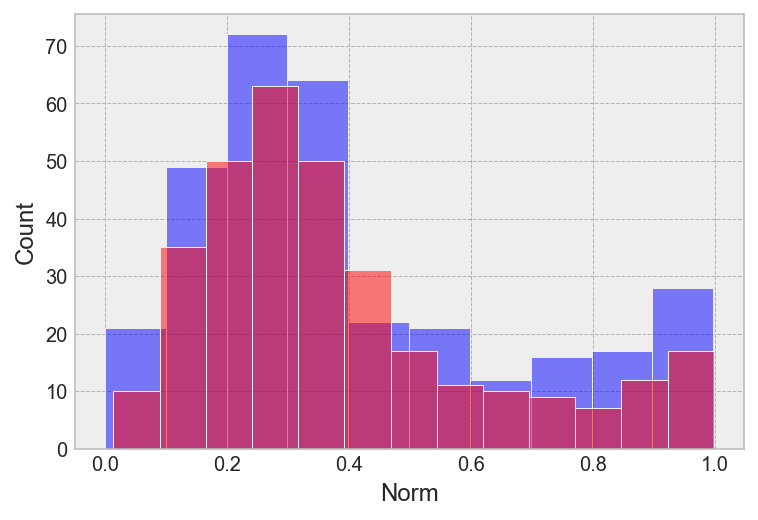

In [145]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)
y_test_pred = regressor.predict(X_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test)))

RandomForestRegressor()

,Actual,Predicted
932,0.079542,0.497007
267,0.338581,0.271189
439,0.782403,0.603907
588,0.155322,0.221519
425,0.634635,0.396122


<AxesSubplot:xlabel='Norm', ylabel='Count'>

<AxesSubplot:xlabel='Norm', ylabel='Count'>

Mean Absolute Error:  0.252500674867641
Mean Squared Error:  0.10478359786824289
Root Mean Squared Error:  0.3237029469563768


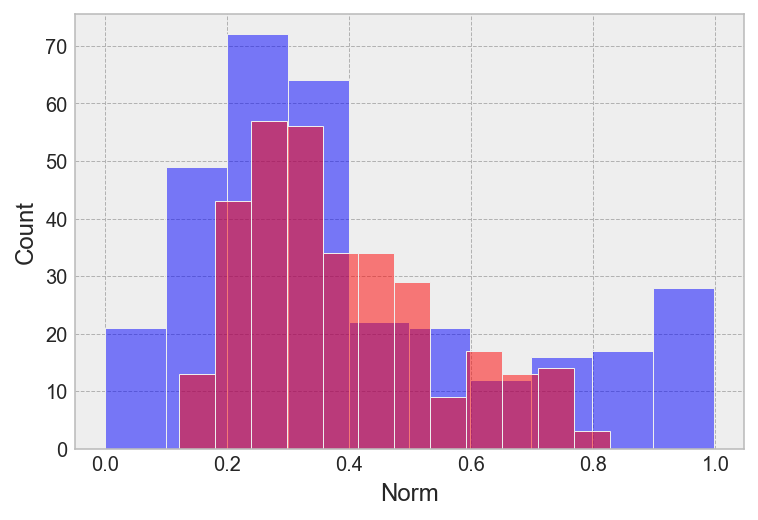

In [146]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)
y_test_pred = regressor.predict(X_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

In [147]:

from sklearn import metrics

MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_GBDT)

print('Mean Squared Error: ', MeanSquaredError_GBDT)

print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)




Mean Absolute Error:  0.252500674867641
Mean Squared Error:  0.10478359786824289
Root Mean Squared Error:  0.3237029469563768
